In [ ]:
#Imports
import numpy as np 
import pandas as pd 

df=pd.read_csv("C:/Users/Heikki/Documents/Portfolio/Data/Student_Performance.csv")
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
replace_dict={'Yes':'1','No':'0'} 
df['Extracurricular Activities']=df['Extracurricular Activities'].replace(replace_dict).astype('int')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int32  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 429.8 KB


In [6]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

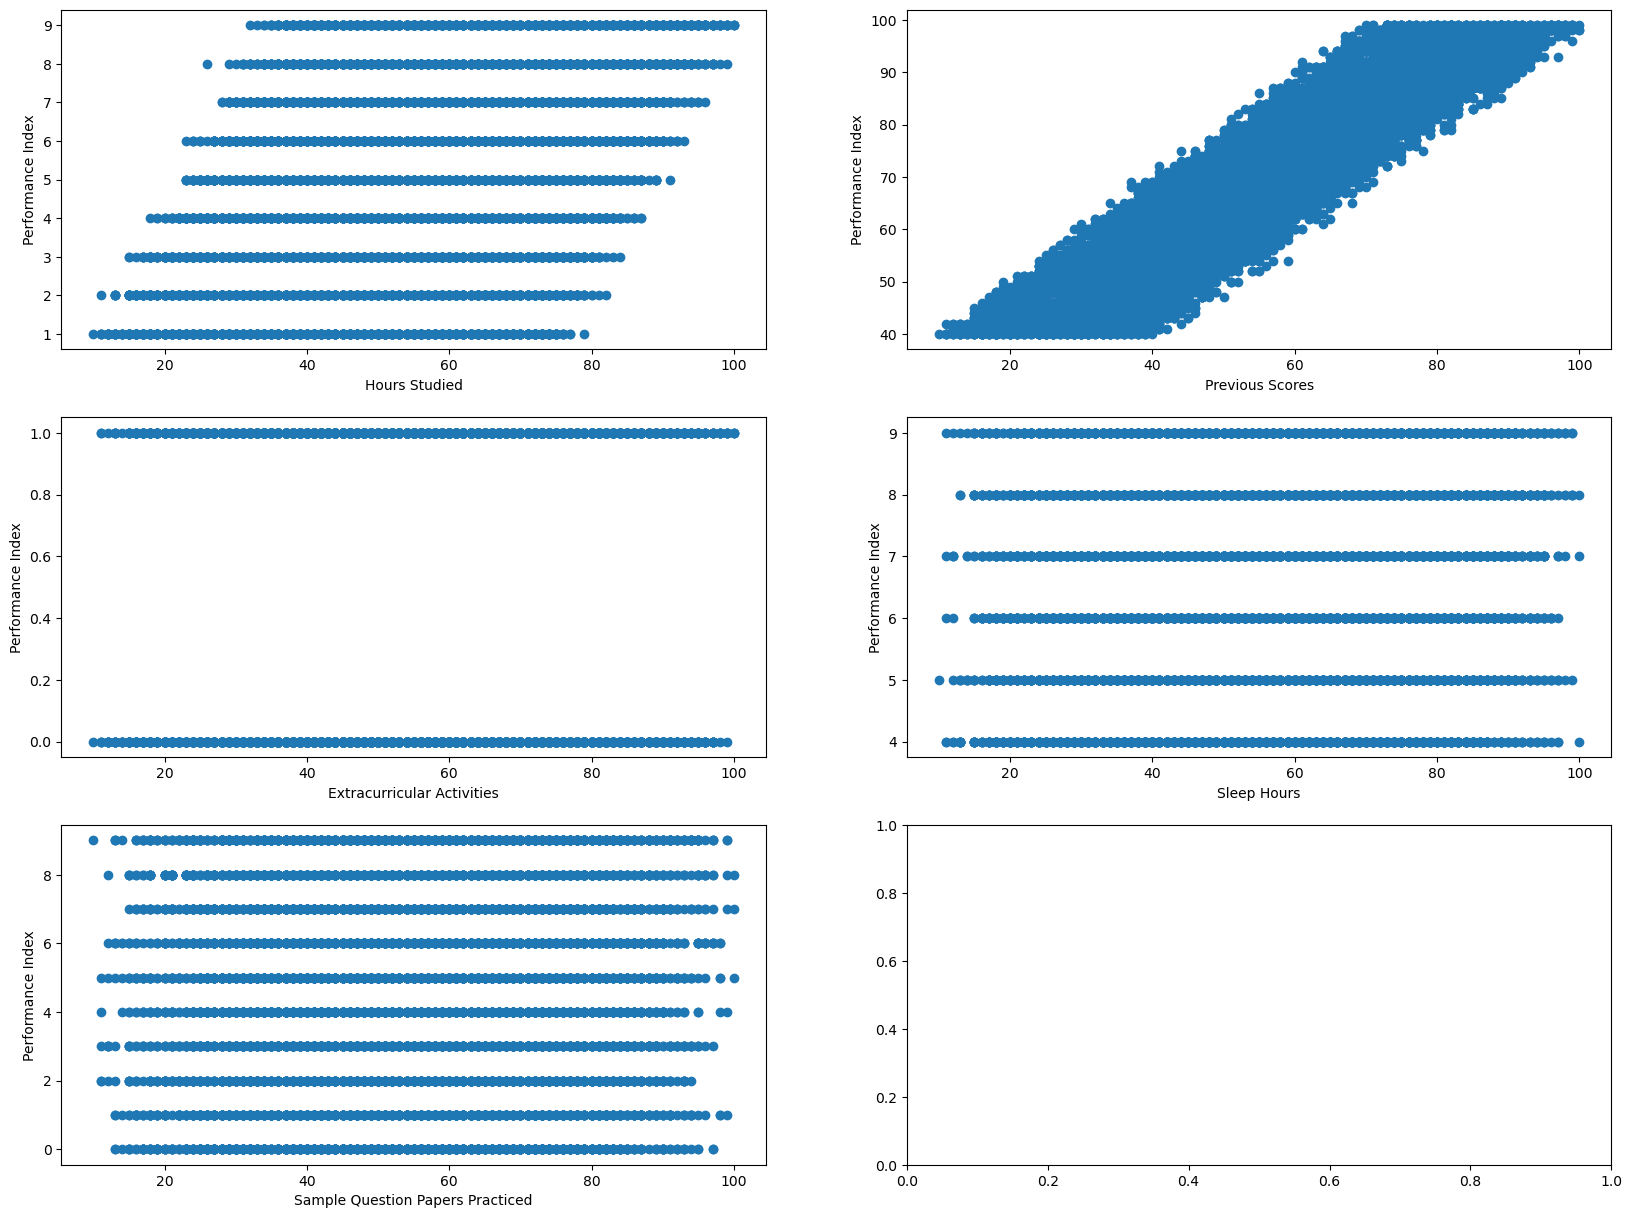

In [7]:
fig,axes=plt.subplots(3,2,figsize=(20,15))
axes=axes.flatten()

for i,column in enumerate(df.columns[:-1]):
    ax=axes[i]
    ax.scatter(df[df.columns[-1]],df[column])
    ax.set_xlabel(column)
    ax.set_ylabel('Performance Index')
plt.show()

<Axes: >

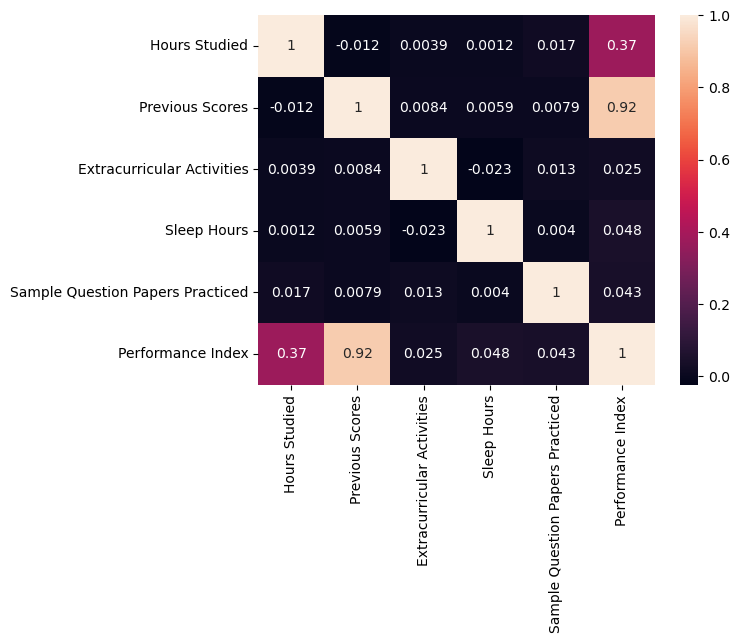

In [8]:
#Find the correlation between the feature vectors and target vector
sns.heatmap(df.corr(),annot=True)

In [9]:
#Drop columns that have less correlation with the target column
target_col=df.columns[-1]
corr=df.corr()[target_col].abs()
high_corr_cols=corr[corr>0.2].index
new_df=df[high_corr_cols]

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hours Studied      10000 non-null  int64  
 1   Previous Scores    10000 non-null  int64  
 2   Performance Index  10000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 234.5 KB


In [11]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Hours Studied    10000 non-null  int64
 1   Previous Scores  10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


In [13]:
#Scaling of Data and splitting into training and testing set
scale=MinMaxScaler().fit(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [14]:
x_train=scale.transform(x_train)
x_test=scale.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [16]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
predictions=model.predict(x_test)

In [18]:
print("R2 Score : ",end="")
print(r2_score(y_test,predictions))
print("Mean Absolute Error : ",end="")
print(mean_absolute_error(y_test,predictions))

R2 Score : 0.9856229048296856
Mean Absolute Error : 1.7951888705390762
